#  Уменьшение палитры изображения 
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a>  уменьшим число цветов в палитре.

Для этого выделим **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуем различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оценим и сравним потери от уменьшения цветов при помощи метрики  SSIM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Реализуем вспомогательную функцию для считывания и вывода изображений:

In [2]:
def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()
    print('\n')

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

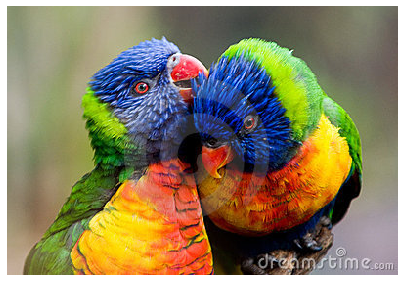

In [3]:
img = cv2.imread('two-lorikeet-birds-2293918.jpg')
draw_picture(img)

In [4]:
import warnings
warnings.simplefilter('ignore')


Data preprocessing

In [5]:
#алгоритмы кластеризации принимают на вход вектор точек
img2 = img.reshape(img.shape[0]*img.shape[1], 3)

Выполним кластеризацию с помощью алгоритма K-means


In [6]:
from skimage.measure import compare_ssim



SSIM: 0.5328742762762967
2-цветная палитра


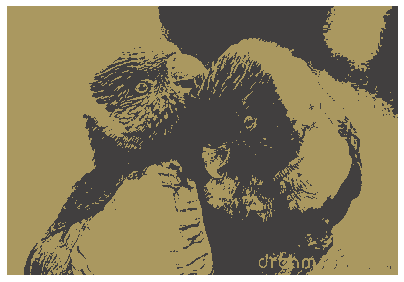



SSIM: 0.5632656307346308
3-цветная палитра


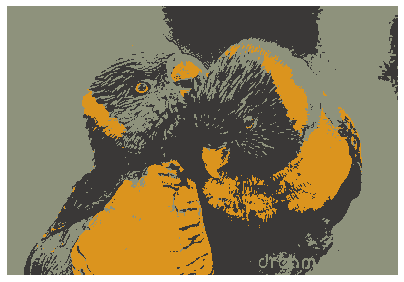



SSIM: 0.6791477611305186
10-цветная палитра


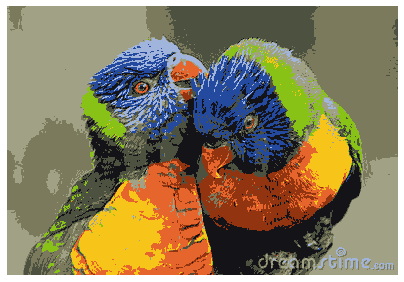



SSIM: 0.7611549918166681
20-цветная палитра


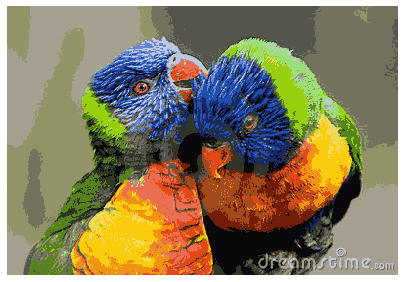



SSIM: 0.7744171517250665
25-цветная палитра


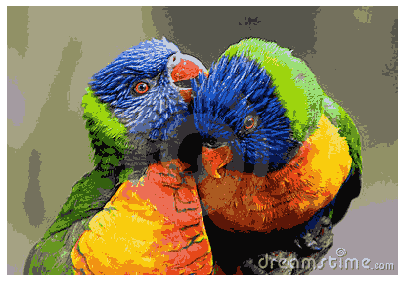



SSIM: 0.7858599771048539
30-цветная палитра


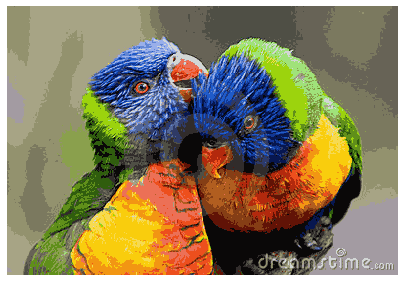



SSIM: 0.7989753059625547
35-цветная палитра


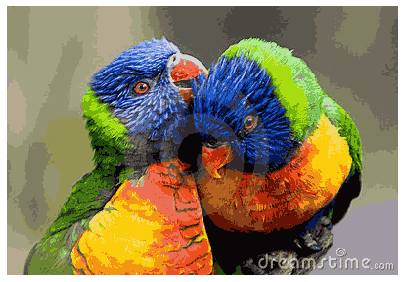



Исходное изображение: 


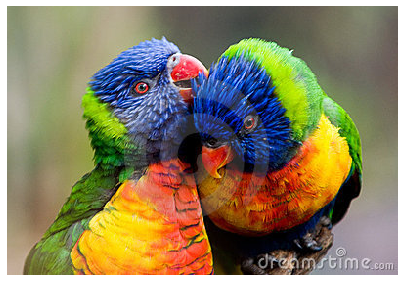

In [46]:
from sklearn.cluster import KMeans
from skimage.measure import compare_ssim as ssim
n_clusters = [2, 3, 10, 20, 25, 30, 35]
ssims = []
for k in n_clusters:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(img2).reshape((img.shape[0], img.shape[1], 1))
    model.cluster_centers_ = model.cluster_centers_.astype(int)
    z = np.zeros(img.shape[0]*img.shape[1]*3).reshape((img.shape[0], img.shape[1], 3))
    z = z.astype(int)
    for i in range(y_pred.shape[0]):
        for j in range(y_pred.shape[1]):
            z[i][j] = model.cluster_centers_[y_pred[i][j][0]]
    z.reshape((img.shape[0], img.shape[1], 3))
    
    print('SSIM:', compare_ssim(z, img, multichannel=True, data_range=img.max() - img.min()))
    ssims.append(compare_ssim(z, img, multichannel=True, data_range=img.max() - img.min()))
    print(f'{k}-цветная палитра')
    draw_picture(z)
print('Исходное изображение: ')
draw_picture(img)


In [42]:
ssims

[0.5328224998000745,
 0.5634982064908153,
 0.6790628092249862,
 0.760820438443047,
 0.7728767355704695,
 0.7871967959380776,
 0.7988794051765379]

С помощью DBSCAN

In [8]:
from sklearn.cluster import DBSCAN



0.33511144327493075
-1


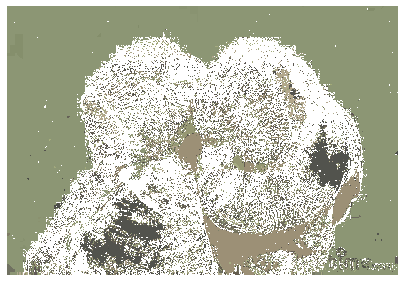

In [47]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=2, min_samples=3)
y_pred = model.fit_predict(img2).reshape((275, 400, 1))
z = np.zeros(275*400*3).reshape((275, 400, 3))
z = z.astype(int)
for i in range(y_pred.shape[0]):
    for j in range(y_pred.shape[1]):
        if y_pred[i][j][0] == -1:
            z[i][j] = np.array([255] * 3)
        else:
            z[i][j] = model.components_[y_pred[i][j][0]]
print(compare_ssim(z, img, multichannel=True, data_range=img.max() - img.min()))
s = set(model.labels_)
print(model.labels_.min())
draw_picture(z)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, linkage='single')
y_pred = model.fit_predict(img2)
z = np.zeros(275*400*3).reshape((275, 400, 3))
z = z.astype(int)
for i in range(y_pred.shape[0]):
    for j in range(y_pred.shape[1]):
        if y_pred[i][j][0] == -1:
            z[i][j] = np.array([255] * 3)
        else:
            z[i][j] = model.components_[y_pred[i][j][0]]
print(compare_ssim(z, img, multichannel=True, data_range=img.max() - img.min()))
s = set(model.labels_)
#print(model.labels_.min())
draw_picture(z)